# **Data Analysis & Pattern Recognition**

## *Statistical Inference and Parameter Estimation. Maximum Likelihood Estimation, Bayesian Inference, Bootstrapping*

Master's Degree in Chemical Engineering

Master's Degree in Interdisciplinary and Innovative Engineering

Lecturer: Francesc **Pozo** (`francesc.pozo@upc.edu`)

File: `DAPR_PE_03_HW_STV.ipynb` (student version). The full version, for reference purposes (lecturers) is `DAPR_PE_03_HW_20201202.ipynb`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Example** (page 14)

Generate 1000 $N(4,1)$ random variables. Write log-likelihood functions for the simulated random variables and verify that the simulated maximum likelihood estimates for $\mu$ and $\sigma^2$ are reasonably close to the true parameters. Produce side-by-side graphs of $\ln\left(L(\mu|\mathbf{x})\right)$ and $\ln\left(L(\sigma|\mathbf{x})\right)$ indicating where the simulated maximum occurs in each graph.

Optimization terminated successfully.
         Current function value: 1400.123090
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 1400.541972
         Iterations: 16
         Function evaluations: 32


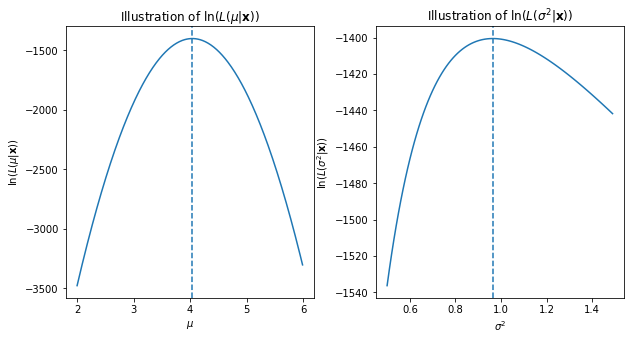

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 1000 
mu = 4
sigma2 = 1
np.random.seed(1)
x = np.random.normal(mu, np.sqrt(sigma2), N)
def negloglikemu(muv):
    return N/2*np.log(2*np.pi)+N/2*np.log(sigma2)\
    +(np.sum(np.square(x))-2*muv*np.sum(x)+N*muv**2)/(2*sigma2)
def negloglike(sv):
    return N/2*np.log(2*np.pi)+N/2*np.log(sv)\
    +(np.sum(np.square(x))-2*mu*np.sum(x)+N*mu**2)/(2*sv)
rr = np.arange(2, 6, 0.01)
rr2 = np.arange(0.5, 1.5, 0.01)
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
plt.subplots_adjust(wspace=.25,hspace=0)
axes[0].plot(rr, -negloglikemu(rr))
axes[0].set_xlabel('$\mu$')
axes[0].set_ylabel('$\ln(L(\mu|\mathbf{x}))$')
from scipy.optimize import fmin
import math
mumin = fmin(negloglikemu,np.array([2]))
sigma2min = fmin(negloglike,np.array([2]))

axes[0].axvline(x=mumin,linestyle='--')
axes[1].plot(rr2, -negloglike(rr2))
axes[0].set_title('Illustration of $\ln(L(\mu|\mathbf{x}))$')

axes[1].set_xlabel('$\sigma^2$')
axes[1].set_ylabel('$\ln(L(\sigma^2|\mathbf{x}))$')
axes[1].set_title('Illustration of $\ln(L(\sigma^2|\mathbf{x}))$')
axes[1].axvline(x=sigma2min,linestyle='--')

plt.savefig('loglike.eps', dpi=300, bbox_inches='tight')
plt.show()

# **Example** (page 17)

Given the density function
\begin{align*}
f(x)=(\theta+1)(1-x)^\theta,\ 0\leq x\leq 1,\ \theta>0,
\end{align*}

1.   Find the maximum likelihood estimator of $\theta$ for a random sample of size $N$.

Answer: $\hat{\theta}=-1-\frac{N}{\sum_{i=1}^N\ln(1-X_i)}$

# **Example** (page 18)

Given the density function
\begin{align*}
f(x)=\theta e^{-\theta x},\ x\geq 0,\ \theta>0,
\end{align*}


1.   Find the maximum likelihood estimator of $\theta$ for a random sample of size $N$.
2.   Set the seed equal to $88$, and generate $1000$ values from $f(x)$ when $\theta=2$. Calculate the maximum likelihood estimate of $\theta$ from the generated values.
3.   How close is the maximum likelihood estimate in (b) to $\theta=2$?

Answer:
1. $\hat{\theta}=\frac{1}{\bar{X}}$ (the inverse of the sample mean)
2. See python code.
3. See python code.

In [ ]:
import numpy as np
np.random.seed(88)
theta = 2
x = np.random.exponential(scale=1/theta,size=1000)
thetahat = 1/x.mean()
print("thetahat =",thetahat)
print("theta-thetahat = ", theta-thetahat)

thetahat = 1.97657150949216
theta-thetahat =  0.023428490507839905


# **Example** (page 27)
Consider a single Gaussian random variable $X$ with variance $\sigma^2=1$. Infer the mean $\mu=\mu_N$ given the set of $N=10$ observations
\begin{align*}
2.16698806, &1.52581308, 0.72238059, 2.44863382, 2.20167179,\\
0.44891844, &1.13245188, 0.36254031, 0.17785248, 3.27225828,
\end{align*}
if we choose a prior $p(\mu)$ given by a Gaussian
\begin{align*}
\mu\hookrightarrow N(\mu_0=1,\sigma_0^2=1.5)
\end{align*}

Answer: According to slide 26,
\begin{align*}
\mu_N&=\dfrac{\sigma^2}{N\sigma_0^2+\sigma^2}\mu_0+\dfrac{N\sigma_0^2}{N\sigma_0^2+\sigma^2}\left(\dfrac{1}{N}\sum_{i=1}^Nx_i\right)
\end{align*}

In [1]:
import numpy as np
mu0 = 1
sigma02 = 1.5
sigma2 = 1
N = 10
x = np.array([2.16698806, 1.52581308, 0.72238059, 2.44863382, 2.20167179, 
              0.44891844, 1.13245188, 0.36254031, 0.17785248, 3.27225828])
muN = sigma2/(N*sigma02+sigma2)*mu0+N*sigma02/(N*sigma02+sigma2)*x.mean()
print("muN = ",muN)

muN =  1.4180789434374999


# **The Bootstrap (part I)** (page 28)

* The **bootstrap** is a flexible and powerful statistical tool that can be used to **quantify the uncertainty** associated with a given estimator or statistical learning method.
* For example, it can provide an estimate of the standard error of a coefficient, or a confidence interval for that coefficient. 
* Suppose that we wish to invest a fixed sum of money in two financial assets that yield returns of $X$ and $Y$, respectively, where $X$ and $Y$ are random quantities.
* We will invest a fraction $\alpha$ of our money in $X$, and will invest the remaining $1-\alpha$ in $Y$.
* We wish to choose $\alpha$ to minimize the total risk --or variance-- of our investment. In other words, we want to minimize
\begin{align*}
\boxed{\text{var}\left(\alpha X+(1-\alpha)Y\right)}
\end{align*}
* One can show that the value that minimizes the risk is given by
\begin{align*}
\boxed{\alpha=\dfrac{\sigma_Y^2-\sigma_{XY}}{\sigma_X^2+\sigma_Y^2-2\sigma_{XY}}}
\end{align*}
* However, the values of $\sigma_X^2,\sigma_Y^2$ and $\sigma_{XY}$ are \alert{unknown}.
* We can compute **estimates** for these quantities, $\hat\sigma_X^2,\hat\sigma_Y^2$ and $\hat\sigma_{XY}$, using a **data set** that contains measurements for $X$ and $Y$.
* We can then estimate the value of $\alpha$ that minimizes the variance of our investment using
\begin{align*}
\boxed{\hat\alpha=\dfrac{\hat\sigma_Y^2-\hat\sigma_{XY}}{\hat\sigma_X^2+\hat\sigma_Y^2-2\hat\sigma_{XY}}}
\end{align*}
* Each panel displays $100$ simulated returns for investments $X$ and $Y$. From left to right and top to bottom, the resulting estimates for $\alpha$ are $0.704$, $0.614$, $0.698$, and $0.486$.

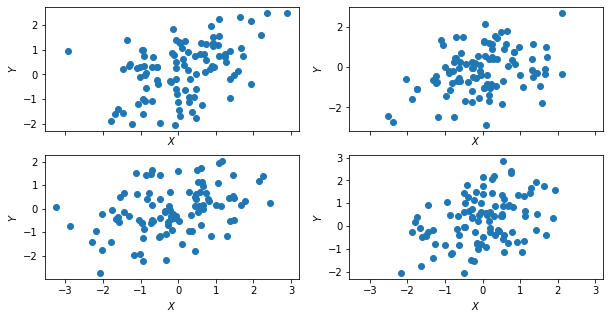

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
meanx = 0
meany = 0
mean = (meanx, meany)
sigmaX2 = 1
sigmaY2 = 1.25
sigmaXY = 0.5
cov = [[sigmaX2, sigmaXY], [sigmaXY, sigmaY2]]
np.random.seed(3)
x = np.random.multivariate_normal(mean, cov,size=(100,4))
f, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=True)
axes[0,0].scatter(x[:,0,0], x[:,0,1])
axes[0,0].set_xlabel('$X$')
axes[0,0].set_ylabel('$Y$')
axes[0,1].scatter(x[:,1,0], x[:,1,1])
axes[0,1].set_xlabel('$X$')
axes[0,1].set_ylabel('$Y$')
axes[1,0].scatter(x[:,2,0], x[:,2,1])
axes[1,0].set_xlabel('$X$')
axes[1,0].set_ylabel('$Y$')
axes[1,1].scatter(x[:,3,0], x[:,3,1])
axes[1,1].set_xlabel('$X$')
axes[1,1].set_ylabel('$Y$')
plt.savefig('randomXY.eps', dpi=300, bbox_inches='tight')
plt.show()

* To **estimate the standard deviation of $\hat\alpha$**, we repeat the process of simulating $100$ paired observations of $X$ and $Y$, and estimating $\alpha$ $1000$ times.
* We thereby obtained $1000$ estimates for $\alpha$, which we can call
\begin{align*}
\hat\alpha_1,\hat\alpha_2,\ldots,\hat\alpha_{1000}
\end{align*}
* For these simulations the parameters were set to $\sigma_X^2=1,\sigma_Y^2=1.25$ and $\sigma_{XY}=0.5$, and so we know that the true value of $\alpha$ is $0.6$. We indicated this value using a dashed vertical line on the histogram.


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
meanx = 0
meany = 0
mean = (meanx, meany)
sigmaX2 = 1
sigmaY2 = 1.25
sigmaXY = 0.5
cov = [[sigmaX2, sigmaXY], [sigmaXY, sigmaY2]]
np.random.seed(3)
x = np.random.multivariate_normal(mean, cov,size=(100,1000))
alpha_list = list()
for k in range(0, 1000):
    sigmaY2hat = np.var(x[:,k,1],ddof=0)
    sigmaX2hat = np.var(x[:,k,0],ddof=0)
    sigmaXYhat = np.cov([x[:,k,0],x[:,k,1]],ddof=0)[0,1]
    alphahat =  (sigmaY2hat-sigmaXYhat)/(sigmaY2hat+sigmaX2hat-2*sigmaXYhat)
    alpha_list.append(alphahat)

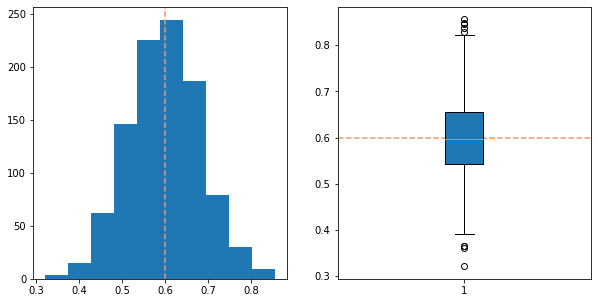

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
axes[0].hist(alpha_list)
axes[0].axvline(x=0.6,linestyle='--',color='darksalmon')
axes[1].boxplot(alpha_list,patch_artist=True)
axes[1].axhline(y=0.6,linestyle='--',color='darksalmon')
plt.savefig('histobox.eps', dpi=300, bbox_inches='tight')
plt.show()

* The mean over all $1000$ estimates for $\alpha$ is
\begin{align*}
\bar\alpha=\dfrac{1}{1000}\sum_{i=1}^{1000}\hat\alpha_i=0.6030,
\end{align*}
very close to $\alpha=0.6$.
* The standard deviation of the estimates is
\begin{align*}
\sqrt{\dfrac{1}{1000-1}\sum_{i=1}^{1000}(\hat\alpha_i-\bar\alpha)^2}=0.084
\end{align*}
* This gives us a very good idea of the accuracy of $\hat\alpha$. Roughly speaking, for a random sample from the population, we would expect $\hat\alpha$ to differ from $\alpha$ by approximately $0.08$, on average.

In [5]:
alphabar = np.mean(alpha_list)
stderror = np.std(alpha_list,ddof=1)
print(alphabar,stderror)

0.5983628824210095 0.0835753594794264


# **The Bootstrap: Back to the Real World! (part II)** (page 40)
The procedure outlined above **cannot be applied**, because for real data we cannot generate new samples from the original population.

* However, the bootstrap approach allows us to use a computer to \alert{mimic} the process of obtaining new data sets, so that we can estimate the variability of our estimate without generating additional samples.

* Rather than repeatedly obtaining independent data sets from the population, we instead obtain distinct data sets by repeatedly sampling observations from the original data set **with replacement**.

* Each of these *bootstrap data sets* is created by sampling **with replacement**, and is the same size as our original dataset. As a result some observations may appear more than once and some not at all.

**The bootstrap**
* Consider an original data set $Z$ with $n$ observations.
* We **randomly** select $n$ observations (**with replacement**) from the data set in order to produce a **bootstrap data set**, $Z^{\star 1}$.
* We can use $Z^{\star 1}$ to produce a new **bootstrap estimate** for $\alpha$, which we call $\hat\alpha^{\star 1}$.
*  This procedure is repeated $B$ times in order to produce $B$ different bootstrap data sets
\begin{align*}
Z^{\star 1},Z^{\star 2},\ldots,Z^{\star B},
\end{align*}
and $B$ corresponding $\alpha$ estimates
\begin{align*}
\hat\alpha^{\star 1},\hat\alpha^{\star 2},\ldots,\hat\alpha^{\star B}.
\end{align*}
We can compute the standard deviation of these bootstrap estimates ---aka standard error--- using the formula
\begin{align*}
SE(\hat\alpha)=\sqrt{\dfrac{1}{B-1}\sum_{i=1}^B\left(\hat\alpha^{\star i}-\dfrac{1}{B}\sum_{j=1}^B\hat\alpha^{\star j}\right)^2}
\end{align*}

*Left*: A histogram of the estimates of $\alpha$ obtained from $1000$ bootstrap samples from a single data set. 
*Right*: The estimates of $\alpha$ displayed in the left panel are shown as a boxplot. In each panel, the dark salmon dashed line indicates the true value of $\alpha$.

In [ ]:
import numpy as np
meanx = 0
meany = 0
mean = (meanx, meany)
sigmaX2 = 1
sigmaY2 = 1.25
sigmaXY = 0.5
cov = [[sigmaX2, sigmaXY], [sigmaXY, sigmaY2]]
np.random.seed(3)
x = np.random.multivariate_normal(mean, cov,size=(100,1000))
bootM = np.zeros((100,2,1000))
alpha_list2 = list()
for i in range(0,1000):
    nprc = np.random.choice(100,100) # array with 100 random integers between 0 and 99
    for k in range(0,100):
        bootM[k,:,i]=x[nprc[k],0,:] #first bootstrap sample
    sigmaY2hat = np.var(bootM[:,1,i],ddof=0)
    sigmaX2hat = np.var(bootM[:,0,i],ddof=0)
    sigmaXYhat = np.cov([bootM[:,0,i],bootM[:,1,i]],ddof=0)[0,1]
    alphahat =  (sigmaY2hat-sigmaXYhat)/(sigmaY2hat+sigmaX2hat-2*sigmaXYhat)
    alpha_list2.append(alphahat) # 1000 estimates of alpha

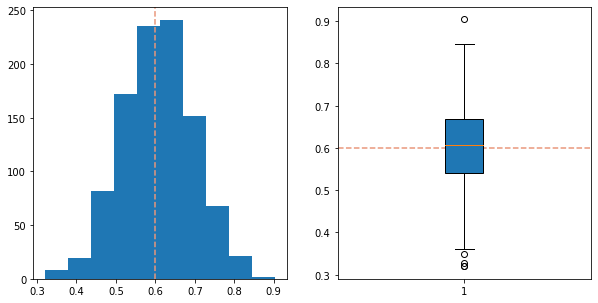

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
axes[0].hist(alpha_list2)
axes[0].axvline(x=0.6,linestyle='--',color='darksalmon')
axes[1].boxplot(alpha_list2,patch_artist=True)
axes[1].axhline(y=0.6,linestyle='--',color='darksalmon')
plt.savefig('histobox2.eps', dpi=300, bbox_inches='tight')
plt.show()

The standard deviation of these bootstrap estimates is $0.090$, very close to the estimate of $0.084$ obtained using $1000$ simulated data sets.

In [ ]:
np.std(alpha_list2,ddof=1)

0.08970390965071544

# **LABWORK: Estimating the Accuracy of a Linear Regression Model** (page 50)

**Simple Linear Regression**

* **Simple linear regression** is a very straightforward approach for predicting a quantitative response $Y$ on the basis of a single predictor variable $X$. It assumes that there is approximately a linear relationship between $X$ and $Y$. Mathematically, we can write this linear relationship as
\begin{align*}
\boxed{Y\approx \beta_0+\beta_1 X.}
\end{align*}

* For example, $X$ may represent `horsepower` and $Y$ may represent `mpg` (miles per gallon) (with respect to the `Auto` data set). Then we can regress `mpg` onto `horsepower` by fitting the model 
\begin{align*}
\boxed{\texttt{mpg}\approx \beta_0+\beta_1\times \texttt{horsepower}.}
\end{align*}

* The `Auto` data set. For a number of cars, `mpg` and `horsepower` are shown. There is a pronounced relationship between `mpg` and `horsepower`.





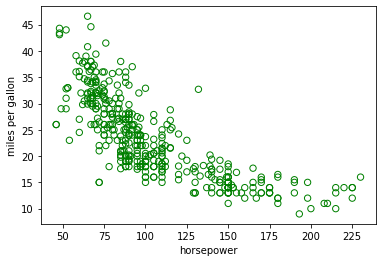

In [ ]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# use the right path in your case
filename = "/content/drive/MyDrive/Colab Notebooks/Auto.csv" 
df = pd.read_csv(filename)
moddf = df.dropna()
v = moddf.values
plt.xlabel('horsepower')
plt.ylabel('miles per gallon')
plt.scatter(v[:,3], v[:,0],s=40,facecolors='none', edgecolors='g')
plt.savefig('scatterAuto.eps', dpi=300, bbox_inches='tight')
plt.show()

* The bootstrap approach can be used to assess the variability of the coefficient estimates and predictions from a statistical learning method.

* We will use the bootstrap approach to assess the variability of the estimates for $\beta_0$ and $\beta_1$, the intercept and slope terms for the linear regression model that uses `horsepower` to predict `mpg` in the `Auto` data set.

* We first import the following Python packages:

In [ ]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

* We then load the `Auto` data set and remove the missing values.

In [ ]:
# use the right path in your case
filename = "/content/drive/MyDrive/Colab Notebooks/Auto.csv" 
df = pd.read_csv(filename)
moddf = df.dropna()
v = moddf.values

* The following Python code can be used to compute the intercept and slope estimates for the linear regression model:

In [ ]:
xtrain = v[:,3].reshape((-1,1))
ytrain = v[:,0]
xtrain_ = PolynomialFeatures(degree=1, include_bias=False).fit_transform(xtrain)
model = LinearRegression().fit(xtrain_, ytrain)
beta0 = model.intercept_
beta1 = model.coef_[0]

* Set this seed so that we all have the exact same result.

In [ ]:
np.random.seed(3)

# **LABWORK #1** 
* Create $B=1000$ bootstrap data sets of $n=N=392$ observations. You will maybe need a loop `for` and the python command `np.random.choice`.

* Create a list `beta0` with the $B=1000$ corresponding $\beta_0$ estimates:
\begin{align*}
\hat{\beta}_0^{\star 1},\hat{\beta}_0^{\star 2},\ldots,\hat{\beta}_0^{\star 1000}
\end{align*}
* Create a list `beta1` with the $B=1000$ corresponding $\beta_1$ estimates:
\begin{align*}
\hat{\beta}_1^{\star 1},\hat{\beta}_1^{\star 2},\ldots,\hat{\beta}_1^{\star 1000}
\end{align*}
* Compute the standard deviation ---standard error--- $SE(\hat{\beta}_0)$ and $SE(\hat{\beta}_1)$ of these bootstrap estimates. You can use `np.std` with `ddof=1`. **In your Python code, denote these two values as `std_beta01` and `std_beta11`, respectively.**
* Compare the intercept $\beta_0$ with the linear regression in the full set of $392$ observations with $\dfrac{1}{1000}\sum_{i=1}^{1000}\hat{\beta}_0^{\star i}$. Compare the slope $\beta_1$ too.

* Compare the slope $\beta_1$ with the linear regression in the full set of $392$ observations with $\dfrac{1}{1000}\sum_{i=1}^{1000}\hat{\beta}_1^{\star i}$.

* Import the following Python packages and plot a histogram of the estimates of $\beta_0$ and $\beta_1$, respectively, from the $B=1000$ bootstrap samples.

In [ ]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

# **LABWORK #2**
* **Repeat** this labwork to compute the bootstrap standard error estimates and the standard linear regression estimates that result from fitting a quadratic model
\begin{align*}
\boxed{\texttt{mpg}\approx \beta_0+\beta_1\times \texttt{horsepower}+\beta_2\times \texttt{horsepower}^2}
\end{align*}
to the data. **In your Python code, denote the standard errors as `std_beta02`, `std_beta12` and `std_beta22`, respectively.**